<a href="https://colab.research.google.com/github/veiro/master-tesis-data-imputation/blob/master/Prueba_de_prediccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo:
Utilizar tecnicas de ml para prededir 2 atributos: uno categorico y otro numerico.

Obtener metricas de que tan bien funciona para la prediccion en el dataset - original.

# Trabajo en siguiente iteracion
Luego de hacer imputacion de datos con los algoritmos GAIN y MIDA se obtiene el dataset-GAIN y dataset-MIDA.

Se va a comporar las metricas de prediccion en:
- dataset - original.
- dataset-GAIN
- dataset-MIDA

In [1]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 30.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ebc619c2ae524327e0f00d542190bd658b533e20f8517f75df3a7361d525b353
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all

In [2]:
!pip install pycaret
#https://pycaret.gitbook.io/docs/get-started/tutorials

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.4 MB/s eta 0

In [3]:
import os
import sys

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tqdm import tqdm
import pandas
from sklearn.model_selection import train_test_split
from google.colab import drive
from ydata_profiling import ProfileReport

from datetime import datetime
from pycaret.regression import *
from pycaret.classification import *

In [4]:
USAR_GOOGLE_DRIVE =  True
MODO_DESARROLLO = True

In [5]:
if (USAR_GOOGLE_DRIVE):
  drive.mount('/content/gdrive')
  PATH_DATA_PROCESADA = "/content/gdrive/MyDrive/Maestria/Tesis/Codigo/data/data-procesada"

Mounted at /content/gdrive


In [6]:
%%time
data_filepath = PATH_DATA_PROCESADA+'/csse_covid_19_data.csv'
data_full = pandas.read_csv(data_filepath)


CPU times: user 8.5 s, sys: 1.1 s, total: 9.61 s
Wall time: 19.9 s


In [7]:
%%time
data_sin_columnas_completas = data_full.drop(['FIPS', 'Admin2', 'Recovered', 'Active', 'Combined_Key'], axis=1)
data_sin_null = data_sin_columnas_completas.dropna(subset=['Province_State', 'Lat', 'Long_', 'Incident_Rate', 'Case_Fatality_Ratio'])


CPU times: user 644 ms, sys: 188 ms, total: 832 ms
Wall time: 841 ms


In [8]:
report = ProfileReport(data_sin_null, minimal=True)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Regresion de un atributo numerico

En base a los dato
(**Province_State	Country_Region	Last_Update	Lat	Long_	Confirmed		Incident_Rate	Case_Fatality_Ratio	date**) el objetivo es predecir **Deaths**

-------

basado en el tutorial: https://colab.research.google.com/github/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Regression.ipynb#scrollTo=40ed5152&uniqifier=1


In [9]:
# para hacer pruebas bajo la cantidad
if(MODO_DESARROLLO):
  data =  data_sin_null.sample(n=10000, random_state=1)
else:
  data = data_sin_null

df_train, df_test = train_test_split(data, test_size=0.10, random_state=42)

In [12]:
%%time
s = setup(df_train, target = 'Deaths', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Deaths
2,Target type,Regression
3,Original data shape,"(9000, 10)"
4,Transformed data shape,"(9000, 34)"
5,Transformed train set shape,"(6300, 34)"
6,Transformed test set shape,"(2700, 34)"
7,Numeric features,5
8,Categorical features,4
9,Preprocess,True


CPU times: user 4.27 s, sys: 136 ms, total: 4.41 s
Wall time: 5.56 s


In [13]:
%%time
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,266.0672,11126846.1977,2332.6463,0.7804,0.9273,1.4188,1.4950
rf,Random Forest Regressor,237.3145,11719663.7321,2442.1992,0.7669,0.2774,0.1001,4.2150
dt,Decision Tree Regressor,261.6840,10391054.7754,2420.0627,0.7607,0.2947,0.0882,0.3120
et,Extra Trees Regressor,276.0534,12851820.5364,2566.0600,0.7370,0.4087,0.2815,1.8370
lightgbm,Light Gradient Boosting Machine,273.3049,11764670.1153,2589.5228,0.7359,0.7568,0.9997,0.8400
xgboost,Extreme Gradient Boosting,268.8125,13161906.5057,2741.1195,0.7123,0.4754,0.3469,0.3270
lr,Linear Regression,896.1562,9233693.7073,2532.3168,0.6784,2.5634,25.1812,0.7940
ridge,Ridge Regression,896.6818,9262577.3348,2535.8176,0.6779,2.5646,25.1558,0.1320
br,Bayesian Ridge,897.6939,9290926.3578,2539.5136,0.6772,2.5655,25.1702,0.1310
llar,Lasso Least Angle Regression,899.1746,9328719.2917,2545.1779,0.6759,2.5646,25.1178,0.2210


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

CPU times: user 12.6 s, sys: 408 ms, total: 13 s
Wall time: 2min 15s


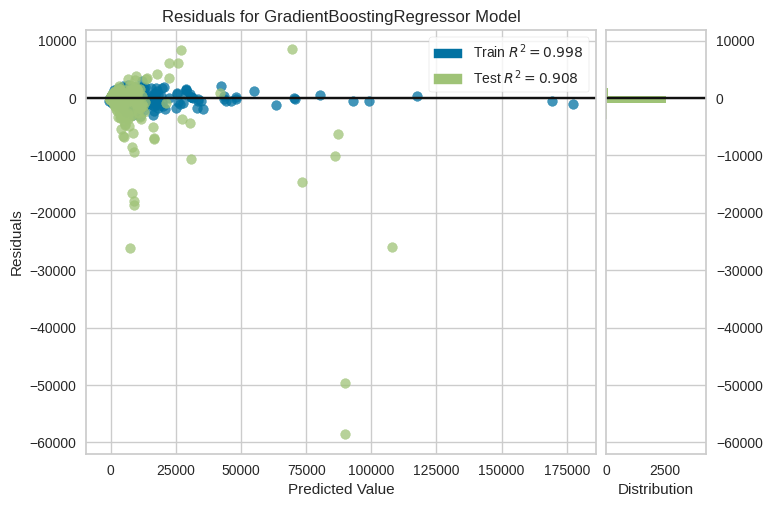

In [14]:
plot_model(best, plot = 'residuals')

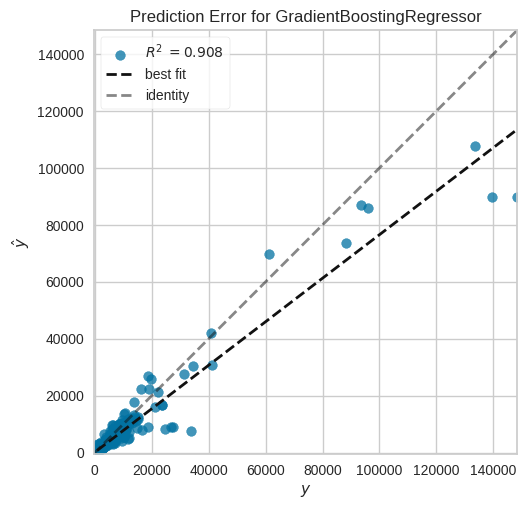

In [15]:
# plot error
plot_model(best, plot = 'error')

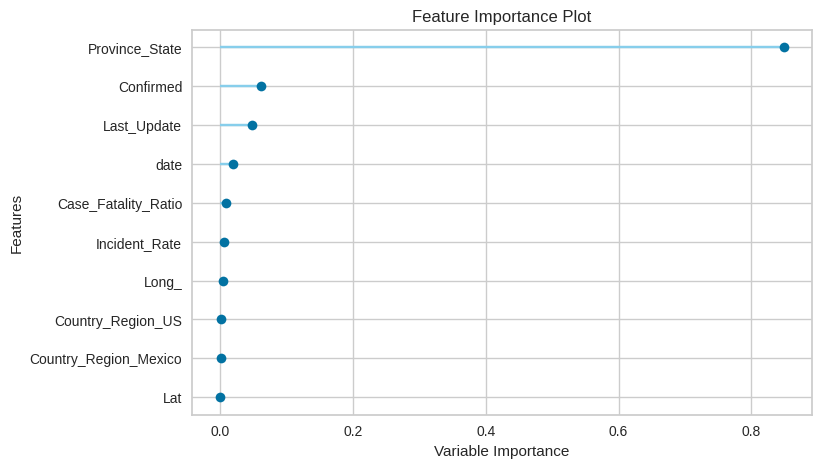

In [16]:
plot_model(best, plot = 'feature')

In [17]:
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,259.9098,3650598.9806,1910.6541,0.9085,0.9057,1.2878


In [18]:
holdout_pred.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Incident_Rate,Case_Fatality_Ratio,date,Deaths,prediction_label
541480,Virginia,US,2021-05-15 04:20:58,37.841579,-78.277153,1914,7018.701660,0.940439,05-14-2021,18,41.243233
2323642,Oregon,US,2022-08-02 04:20:53,45.578941,-117.183540,1369,18992.785156,1.168736,08-01-2022,16,43.063361
2216126,Wisconsin,US,2022-07-06 04:20:58,44.517273,-87.614685,6118,29940.294922,0.980713,07-05-2022,60,82.221458
253694,California,US,2021-03-05 05:26:29,36.757339,-119.646698,103769,10422.370117,1.365601,03-04-2021,1422,1676.185343
2734660,Nara,Japan,2022-11-13 04:21:14,34.317451,135.871643,236858,17807.224609,0.238117,11-12-2022,564,741.743874


In [19]:
predictions = predict_model(best, data = df_test)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,138.7761,440034.2460,663.3508,0.9744,0.8302,1.3714


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Incident_Rate,Case_Fatality_Ratio,date,Deaths,prediction_label
2139591,Virginia,US,2022-06-17 04:20:56,37.481335,-80.210724,1155,22510.232422,1.645022,06-16-2022,19,53.279271
1221534,Idaho,US,2021-11-01 04:22:01,42.282696,-111.328926,698,11395.917969,1.862464,10-31-2021,13,53.997317
1638440,Cajamarca,Peru,2022-02-13 04:21:00,-6.430284,-78.745598,91844,6317.947266,4.673141,02-12-2022,4292,2789.901430
2213422,Georgia,US,2022-07-06 04:20:58,32.509319,-84.871422,39655,20256.015625,2.113227,07-05-2022,838,560.553551
2883965,Florida,US,2022-12-20 04:21:04,27.077208,-80.431099,38932,24181.367188,1.880201,12-19-2022,732,560.553551


In [22]:
now = datetime.now()
time = now.strftime("%H:%M:%S")

ruta_modelo = PATH_DATA_PROCESADA + '/modelo_prediccion/' + 'regresion_deaths_'+time
save_model(best, ruta_modelo)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Lat', 'Long_', 'Confirmed',
                                              'Incident_Rate',
                                              'Case_Fatality_Ratio'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Province_State', 'Country_Region',
                                              'Last_Update', 'date'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),...
                  TransformerWrapper(include=['Country_Region'],
                                     transformer=OneHotEncoder(cols=['Country_Region'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('rest_en

In [23]:
loaded_best_pipeline = load_model(ruta_modelo)
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Lat', 'Long_', 'Confirmed',
                                             'Incident_Rate',
                                             'Case_Fatality_Ratio'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Province_State', 'Country_Region',
                                             'Last_Update', 'date'],
                                    transformer=SimpleImputer(strategy='most_fr...
                 TransformerWrapper(include=['Country_Region'],
                                    transformer=OneHotEncoder(cols=['Country_Region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('rest_encoding',
                 TransformerWrapper(include=['Province_State', 'Last_Update',
                                             'date'],
                                    transformer=TargetEncoder(cols=['Province_State',
                                                                    'Last_Update',
                                                                    'date'],
                                                              handle_missing='return_nan'))),
                ('trained_model', GradientBoostingRegressor(random_state=123))])

#Prediccion de un campo categorico

En base a los dato
(**Deaths	 Province_State	Last_Update	Lat	Long_	Confirmed		Incident_Rate	Case_Fatality_Ratio	date**) el objetivo es predecir **Country_Region**

------------

Basado en el tutorial https://colab.research.google.com/github/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Multiclass%20Classification.ipynb#scrollTo=4181de41&uniqifier=1

In [31]:
%%time
exp = ClassificationExperiment()
exp.setup(df_train, target = 'Country_Region', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Country_Region
2,Target type,Multiclass
3,Target mapping,"Australia: 0, Belgium: 1, Brazil: 2, Canada: 3, Chile: 4, China: 5, Colombia: 6, Denmark: 7, France: 8, Germany: 9, India: 10, Italy: 11, Japan: 12, Malaysia: 13, Mexico: 14, Netherlands: 15, New Zealand: 16, Pakistan: 17, Peru: 18, Russia: 19, Spain: 20, Sweden: 21, US: 22, Ukraine: 23, United Kingdom: 24"
4,Original data shape,"(9000, 10)"
5,Transformed data shape,"(9000, 10)"
6,Transformed train set shape,"(6300, 10)"
7,Transformed test set shape,"(2700, 10)"
8,Numeric features,6
9,Categorical features,3


CPU times: user 2 s, sys: 3.68 ms, total: 2 s
Wall time: 2.04 s


In [ ]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:10:29
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [36]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

ValueError: ignored

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

In [ ]:
# show predictions df
holdout_pred.head()

In [ ]:
# predict model on new_data
predictions = predict_model(best, data = df_test)
predictions.head()

In [ ]:
now = datetime.now()
time = now.strftime("%H:%M:%S")

ruta_modelo = PATH_DATA_PROCESADA + '/modelo_prediccion/' + 'clsificacion_Country_Region_'+time
save_model(best, ruta_modelo)

In [ ]:
# load pipeline
loaded_best_pipeline = load_model(ruta_modelo)
loaded_best_pipeline